# Load basic libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as ms

In [4]:
import warnings
warnings.filterwarnings('ignore')

# Load the data

In [5]:
df=pd.read_csv(r'C:\Users\ABHI\INEURON\PROJECTS\ADULT CENSUS PREDICTION\proj_1_adult_census_prediction\data\processed\final_data.csv')
df.head(5)

,Unnamed: 0,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,country,salary
0,0,39.0,gov,77516.0,undergrad,13.0,not_married,Adm-clerical,Not-in-family,White,Male,40,US,0
1,1,50.0,self_employed,83311.0,undergrad,13.0,married,Exec-managerial,Husband,White,Male,13,US,0
2,2,38.0,Private,215646.0,high school,9.0,other,Handlers-cleaners,Not-in-family,White,Male,40,US,0
3,3,53.0,Private,234721.0,school,7.0,married,Handlers-cleaners,Husband,Black,Male,40,US,0
4,4,28.0,Private,338409.0,undergrad,13.0,married,Prof-specialty,Wife,Black,Female,40,Non-US,0


In [6]:
df.columns

Index(['Unnamed: 0', 'age', 'workclass', 'fnlwgt', 'education',
       'education-num', 'marital-status', 'occupation', 'relationship', 'race',
       'sex', 'hours-per-week', 'country', 'salary'],
      dtype='object')

In [7]:
df=df.drop('Unnamed: 0',axis=1)
df.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,country,salary
0,39.0,gov,77516.0,undergrad,13.0,not_married,Adm-clerical,Not-in-family,White,Male,40,US,0
1,50.0,self_employed,83311.0,undergrad,13.0,married,Exec-managerial,Husband,White,Male,13,US,0
2,38.0,Private,215646.0,high school,9.0,other,Handlers-cleaners,Not-in-family,White,Male,40,US,0
3,53.0,Private,234721.0,school,7.0,married,Handlers-cleaners,Husband,Black,Male,40,US,0
4,28.0,Private,338409.0,undergrad,13.0,married,Prof-specialty,Wife,Black,Female,40,Non-US,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32561 non-null  float64
 1   workclass       32561 non-null  object 
 2   fnlwgt          32561 non-null  float64
 3   education       32561 non-null  object 
 4   education-num   32561 non-null  float64
 5   marital-status  32561 non-null  object 
 6   occupation      32561 non-null  object 
 7   relationship    32561 non-null  object 
 8   race            32561 non-null  object 
 9   sex             32561 non-null  object 
 10  hours-per-week  32561 non-null  int64  
 11  country         32561 non-null  object 
 12  salary          32561 non-null  int64  
dtypes: float64(3), int64(2), object(8)
memory usage: 3.2+ MB


In [9]:
df.shape

(32561, 13)

In [10]:
df['salary'].value_counts(normalize = True)*100

0    75.919044
1    24.080956
Name: salary, dtype: float64

#### Here we can see that 76% people have income below 50k and remaining have income above 50k,so the data here is skewed

# Handling Imbalace Data

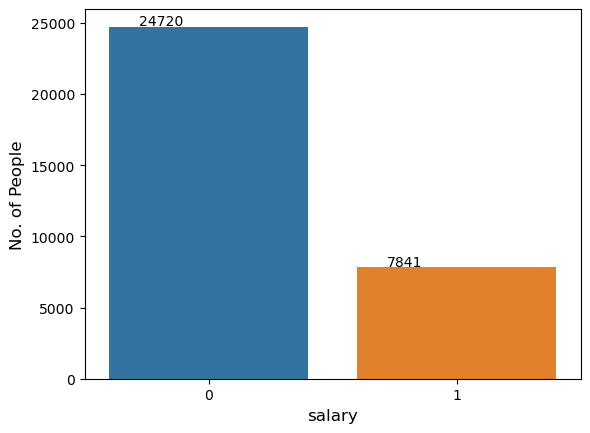

In [11]:
ax=sns.countplot(df['salary'])
plt.xlabel("salary", fontsize= 12)
plt.ylabel("No. of People", fontsize= 12)
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.12, p.get_height()+100))

#### So we have imbalce data as we have <=50K with 24720 records and >50K class with 7841 records.

## Encoding feature from training set and test set

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [13]:
df_encoded=df.copy()

In [14]:
df_encoded.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'hours-per-week', 'country', 'salary'],
      dtype='object')

In [15]:
for col in df_encoded.columns:
    if df_encoded[col].dtypes == 'object':
        le.fit(df[col])
        df_encoded[col]=le.transform(df_encoded[col].astype(str))

In [16]:
df_encoded.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,country,salary
0,39.0,1,77516.0,5,13.0,1,0,1,4,1,40,1,0
1,50.0,2,83311.0,5,13.0,0,3,0,4,1,13,1,0
2,38.0,0,215646.0,2,9.0,2,5,1,4,1,40,1,0
3,53.0,0,234721.0,4,7.0,0,5,0,2,1,40,1,0
4,28.0,0,338409.0,5,13.0,0,9,5,2,0,40,0,0
5,37.0,0,284582.0,1,14.0,0,3,5,4,0,40,1,0
6,49.0,0,160187.0,4,5.0,2,7,1,2,0,16,0,0
7,52.0,2,209642.0,2,9.0,0,3,0,4,1,45,1,1
8,31.0,0,45781.0,1,14.0,1,9,1,4,0,50,1,1
9,42.0,0,159449.0,5,13.0,0,3,0,4,1,40,1,1


In [17]:
df_encoded.to_csv(r"C:\Users\ABHI\INEURON\PROJECTS\ADULT CENSUS PREDICTION\proj_1_adult_census_prediction\data\processed\final_data_encoded.csv")

In [18]:
df_encoded.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,country,salary
0,39.0,1,77516.0,5,13.0,1,0,1,4,1,40,1,0
1,50.0,2,83311.0,5,13.0,0,3,0,4,1,13,1,0
2,38.0,0,215646.0,2,9.0,2,5,1,4,1,40,1,0
3,53.0,0,234721.0,4,7.0,0,5,0,2,1,40,1,0
4,28.0,0,338409.0,5,13.0,0,9,5,2,0,40,0,0


# Handling imbalance with SMOTE

**Report**
- The target classes are highly imbalanced
- Class imbalance is a scenario that arises when we have unequal distribution of class in a dataset i.e. the no. of data points in the negative class (majority class) very large compared to that of the positive class (minority class)
- If the imbalanced data is not treated beforehand, then this will degrade the performance of the classifier model. 
- Hence we should handle imbalanced data with certain methods.

**How to handle Imbalance Data ?**

- Resampling data is one of the most commonly preferred approaches to deal with an imbalanced dataset. There are broadly two types of methods for this i) Undersampling ii) Oversampling. In most cases, oversampling is preferred over undersampling techniques. The reason being, in undersampling we tend to remove instances from data that may be carrying some important information.
- **SMOTE:** Synthetic Minority Oversampling Technique
- SMOTE is an oversampling technique where the synthetic samples are generated for the minority class.
- Hybridization techniques involve combining both undersampling and oversampling techniques. This is done to optimize the performance of classifier models for the samples created as part of these techniques.
- It only duplicates the data and it won't add and new information. Hence we look at some different techniques.

In [19]:
x=df_encoded.drop("salary",axis=1)
y=df_encoded["salary"]

In [20]:
from imblearn.over_sampling import SMOTE 
SMOTE = SMOTE()

x_res, y_res = SMOTE.fit_resample(x, y)

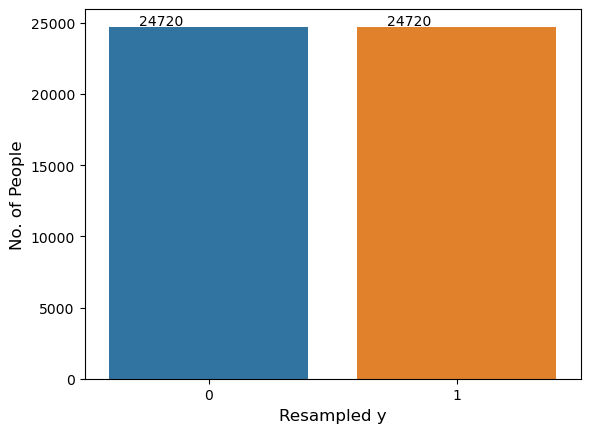

In [21]:
#after resampling 
ax=sns.countplot(y_res)
plt.xlabel("Resampled y", fontsize= 12)
plt.ylabel("No. of People", fontsize= 12)
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.12, p.get_height()+100))

In [22]:
x_res

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,country
0,39.000000,1,77516.000000,5,13.000000,1,0,1,4,1,40,1
1,50.000000,2,83311.000000,5,13.000000,0,3,0,4,1,13,1
2,38.000000,0,215646.000000,2,9.000000,2,5,1,4,1,40,1
3,53.000000,0,234721.000000,4,7.000000,0,5,0,2,1,40,1
4,28.000000,0,338409.000000,5,13.000000,0,9,5,2,0,40,0
...,...,...,...,...,...,...,...,...,...,...,...,...
49435,45.478964,0,153381.392509,2,11.043612,0,10,0,4,0,47,1
49436,32.000000,0,207668.000000,5,13.000000,0,3,1,4,1,48,1
49437,59.273484,1,195453.817331,2,10.818371,0,3,0,4,1,63,1
49438,36.833804,0,37311.833804,1,13.638967,0,4,0,4,1,53,1


In [23]:
y_res

0        0
1        0
2        0
3        0
4        0
        ..
49435    1
49436    1
49437    1
49438    1
49439    1
Name: salary, Length: 49440, dtype: int64

In [24]:
y_res_df=pd.DataFrame(y_res,columns=['salary'])

In [25]:
y_res_df

,salary
0,0
1,0
2,0
3,0
4,0
...,...
49435,1
49436,1
49437,1
49438,1


In [26]:
df_with_SMOTE=pd.concat([x_res,y_res_df],axis=1).drop_duplicates()
df_with_SMOTE.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,country,salary
0,39.0,1,77516.0,5,13.0,1,0,1,4,1,40,1,0
1,50.0,2,83311.0,5,13.0,0,3,0,4,1,13,1,0
2,38.0,0,215646.0,2,9.0,2,5,1,4,1,40,1,0
3,53.0,0,234721.0,4,7.0,0,5,0,2,1,40,1,0
4,28.0,0,338409.0,5,13.0,0,9,5,2,0,40,0,0


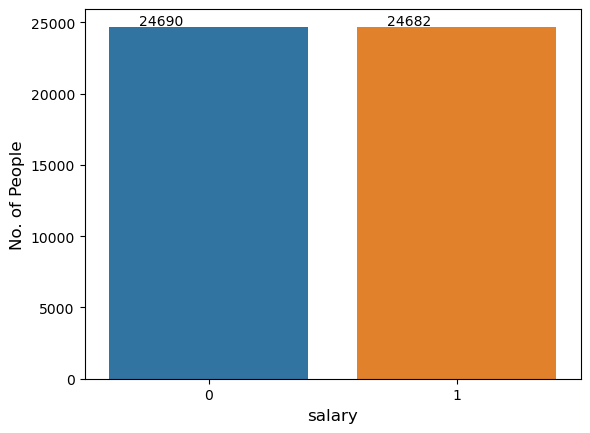

In [27]:
#after resampling 
ax=sns.countplot(df_with_SMOTE['salary'])
plt.xlabel("salary", fontsize= 12)
plt.ylabel("No. of People", fontsize= 12)
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.12, p.get_height()+100))

In [28]:
df_with_SMOTE.shape

(49372, 13)

In [29]:
df_with_SMOTE.to_csv(r"C:\Users\ABHI\INEURON\PROJECTS\ADULT CENSUS PREDICTION\proj_1_adult_census_prediction\data\processed\final_data_with_SMOTE.csv")

In [30]:
df_with_SMOTE.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,country,salary
0,39.0,1,77516.0,5,13.0,1,0,1,4,1,40,1,0
1,50.0,2,83311.0,5,13.0,0,3,0,4,1,13,1,0
2,38.0,0,215646.0,2,9.0,2,5,1,4,1,40,1,0
3,53.0,0,234721.0,4,7.0,0,5,0,2,1,40,1,0
4,28.0,0,338409.0,5,13.0,0,9,5,2,0,40,0,0


# MODEL TRAINING AND EAVALUTION WITH DEFAULT PARAMETER

In [31]:
x=df_with_SMOTE.drop('salary',axis=1)
y=df_with_SMOTE['salary']

In [32]:
print(x.shape,y.shape)

(49372, 12) (49372,)


# TRAIN TEST SPLIT

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [35]:
len(np.array(x_test)[0])

12

In [36]:
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(39497, 12) (9875, 12)
(39497,) (9875,)


In [37]:
final_training_data=pd.concat([x_train,y_train],axis=1)
final_training_data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,country,salary
13165,28.000000,0,38309.000000,3,11.000000,0,0,0,4,1,40,1,0
1467,49.000000,0,101320.000000,1,14.000000,2,3,1,4,0,75,1,0
39823,66.402963,1,190667.766417,0,15.800988,0,9,0,4,0,49,1,1
6726,28.000000,0,32291.000000,5,13.000000,1,9,1,4,0,40,1,0
10883,46.000000,0,81497.000000,2,9.000000,2,5,1,4,0,48,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11287,24.000000,1,247075.000000,2,9.000000,1,0,4,2,0,20,1,0
44792,44.062131,0,42224.300471,3,10.000000,0,9,0,4,1,44,1,1
38204,28.140181,0,176683.000000,5,13.000000,0,4,0,4,1,50,1,1
860,18.000000,0,216284.000000,4,7.000000,1,0,3,4,0,20,1,0


In [38]:
final_testing_data=pd.concat([x_test,y_test],axis=1)
final_testing_data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,country,salary
5612,53.000000,1,53197.000000,0,16.000000,0,0,0,4,1,50,1,1
30969,51.000000,0,305673.000000,3,11.000000,0,2,0,4,1,40,0,1
25655,39.000000,0,114591.000000,3,10.000000,2,9,4,4,0,40,1,0
21758,50.000000,0,341797.000000,2,9.000000,2,2,1,4,1,40,1,0
26581,36.000000,1,340091.000000,0,16.000000,0,9,5,4,0,36,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13159,35.000000,0,70447.000000,3,10.000000,1,9,4,1,1,20,1,0
41912,47.060594,0,217076.442863,2,9.904433,0,2,3,4,0,38,1,1
475,46.000000,0,279196.000000,5,13.000000,1,2,1,4,0,40,1,0
41970,39.150075,0,156896.785607,2,9.000000,0,1,2,4,1,41,1,1


In [39]:
final_training_data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'hours-per-week', 'country', 'salary'],
      dtype='object')

In [40]:
final_training_data.duplicated(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'hours-per-week', 'country', 'salary']).value_counts()

False    39497
dtype: int64

In [41]:
final_testing_data.duplicated(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'hours-per-week', 'country', 'salary']).value_counts()

False    9875
dtype: int64

So there are no duplicates in training data ? testing data.

In [42]:
final_training_data.to_csv(r"C:\Users\ABHI\INEURON\PROJECTS\ADULT CENSUS PREDICTION\proj_1_adult_census_prediction\data\processed\final_training_data.csv")
final_testing_data.to_csv(r"C:\Users\ABHI\INEURON\PROJECTS\ADULT CENSUS PREDICTION\proj_1_adult_census_prediction\data\processed\final_testing_data.csv")

# Training all classification algorithm

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Logistic regression

In [44]:
log_reg= LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression()

In [45]:
y_pred_logreg=log_reg.predict(x_test)

In [47]:
y_pred_logreg

array([1, 0, 1, ..., 0, 1, 0], dtype=int64)

In [55]:
# evaluating the model

from sklearn.metrics import accuracy_score,confusion_matrix,plot_confusion_matrix,roc_auc_score,r2_score,mean_squared_error,classification_report

print("Training Accuracy :", log_reg.score(x_train, y_train))
print("Testing Accuracy :", log_reg.score(x_test, y_test))
print("ROC AUC Score :", roc_auc_score(y_pred_logreg,y_test))
print('*'*100)
print(confusion_matrix(y_test,y_pred_logreg))
print('*'*100)
print(classification_report(y_pred_logreg,y_test))

Training Accuracy : 0.5750816517710206
Testing Accuracy : 0.5804556962025317
ROC AUC Score : 0.5960926715675986
****************************************************************************************************
[[1842 3080]
 [1063 3890]]
****************************************************************************************************
              precision    recall  f1-score   support

           0       0.37      0.63      0.47      2905
           1       0.79      0.56      0.65      6970

    accuracy                           0.58      9875
   macro avg       0.58      0.60      0.56      9875
weighted avg       0.66      0.58      0.60      9875



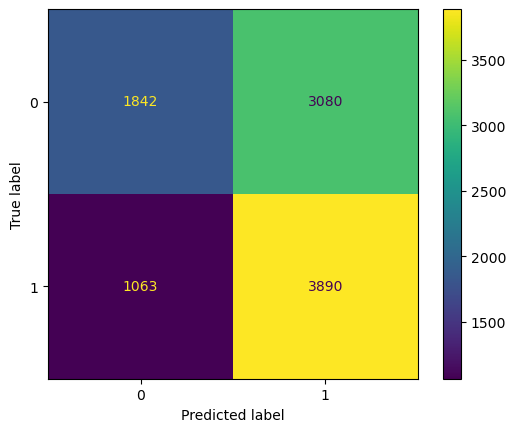

In [54]:
plot_confusion_matrix(log_reg,x_test,y_test,)
plt.show()

# DecisionTree Classifier

In [170]:
dtree=DecisionTreeClassifier()
dtree.fit(x_train,y_train)

DecisionTreeClassifier()

In [171]:
y_pred_dtree=dtree.predict(x_test)

In [172]:
y_pred_dtree

array([0, 1, 0, ..., 0, 0, 1], dtype=int64)

In [173]:
# evaluating the DecisionTree Classifier model
print("Training Accuracy :", dtree.score(x_train, y_train))
print("Testing Accuracy :", dtree.score(x_test, y_test))
print("ROC AUC Score :", roc_auc_score(y_pred_dtree,y_test))
print('*'*100)
print(confusion_matrix(y_pred_dtree,y_test))
print('*'*100)
print(classification_report(y_pred_dtree,y_test))

Training Accuracy : 0.9999493927125506
Testing Accuracy : 0.8357287449392713
ROC AUC Score : 0.8357265976892825
****************************************************************************************************
[[4107  810]
 [ 813 4150]]
****************************************************************************************************
              precision    recall  f1-score   support

           0       0.83      0.84      0.84      4917
           1       0.84      0.84      0.84      4963

    accuracy                           0.84      9880
   macro avg       0.84      0.84      0.84      9880
weighted avg       0.84      0.84      0.84      9880



# Randome Forest classifier

In [174]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [175]:
y_pred_rf=rf.predict(x_test)

In [176]:
y_pred_rf

array([0, 1, 0, ..., 0, 0, 1], dtype=int64)

In [177]:
# evaluating the RandomeForest model
print("Training Accuracy :", rf.score(x_train, y_train))
print("Testing Accuracy :", rf.score(x_test, y_test))
print("ROC AUC Score :", roc_auc_score(y_pred_rf,y_test))
print('*'*100)
print(confusion_matrix(y_pred_rf,y_test))
print('*'*100)
print(classification_report(y_pred_rf,y_test))

Training Accuracy : 0.9999493927125506
Testing Accuracy : 0.8756072874493928
ROC AUC Score : 0.8756226806537628
****************************************************************************************************
[[4326  635]
 [ 594 4325]]
****************************************************************************************************
              precision    recall  f1-score   support

           0       0.88      0.87      0.88      4961
           1       0.87      0.88      0.88      4919

    accuracy                           0.88      9880
   macro avg       0.88      0.88      0.88      9880
weighted avg       0.88      0.88      0.88      9880



# xgboost model

In [178]:
xgb=XGBClassifier()
xgb.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [179]:
y_pred_xgb=xgb.predict(x_test)

In [180]:
y_pred_xgb

array([0, 1, 1, ..., 0, 0, 1])

In [181]:
# evaluating the XGBClassifier model
print("Training Accuracy :", xgb.score(x_train, y_train))
print("Testing Accuracy :", xgb.score(x_test, y_test))
print("ROC AUC Score :", roc_auc_score(y_pred_xgb,y_test))
print('*'*100)
print(confusion_matrix(y_pred_xgb,y_test))
print('*'*100)
print(classification_report(y_pred_xgb,y_test))

Training Accuracy : 0.9191801619433199
Testing Accuracy : 0.8848178137651822
ROC AUC Score : 0.8848902217597174
****************************************************************************************************
[[4389  607]
 [ 531 4353]]
****************************************************************************************************
              precision    recall  f1-score   support

           0       0.89      0.88      0.89      4996
           1       0.88      0.89      0.88      4884

    accuracy                           0.88      9880
   macro avg       0.88      0.88      0.88      9880
weighted avg       0.88      0.88      0.88      9880



# KNN Clssifier

In [182]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [183]:
y_pred_knn=knn.predict(x_test)

In [184]:
y_pred_knn

array([1, 1, 1, ..., 0, 1, 0], dtype=int64)

In [185]:
# evaluating the KNeighborsClassifier model
print("Training Accuracy :", knn.score(x_train, y_train))
print("Testing Accuracy :", knn.score(x_test, y_test))
print("ROC AUC Score :", roc_auc_score(y_pred_knn,y_test))
print('*'*100)
print(confusion_matrix(y_pred_knn,y_test))
print('*'*100)
print(classification_report(y_pred_knn,y_test))

Training Accuracy : 0.7996963562753037
Testing Accuracy : 0.6933198380566802
ROC AUC Score : 0.698612682789898
****************************************************************************************************
[[2999 1109]
 [1921 3851]]
****************************************************************************************************
              precision    recall  f1-score   support

           0       0.61      0.73      0.66      4108
           1       0.78      0.67      0.72      5772

    accuracy                           0.69      9880
   macro avg       0.69      0.70      0.69      9880
weighted avg       0.71      0.69      0.70      9880



# Naive Bayes

In [186]:
nb= GaussianNB()
nb.fit(x_train,y_train)

GaussianNB()

In [188]:
y_pred_nb=nb.predict(x_test)

In [189]:
y_pred_nb

array([1, 1, 0, ..., 0, 1, 1], dtype=int64)

In [190]:
# evaluating the Naive Bayes model
print("Training Accuracy :", nb.score(x_train, y_train))
print("Testing Accuracy :", nb.score(x_test, y_test))
print("ROC AUC Score :", roc_auc_score(y_pred_nb,y_test))
print('*'*100)
print(confusion_matrix(y_pred_nb,y_test))
print('*'*100)
print(classification_report(y_pred_nb,y_test))

Training Accuracy : 0.7615384615384615
Testing Accuracy : 0.7577935222672065
ROC AUC Score : 0.77409181761151
****************************************************************************************************
[[3122  595]
 [1798 4365]]
****************************************************************************************************
              precision    recall  f1-score   support

           0       0.63      0.84      0.72      3717
           1       0.88      0.71      0.78      6163

    accuracy                           0.76      9880
   macro avg       0.76      0.77      0.75      9880
weighted avg       0.79      0.76      0.76      9880



# support vector classifier

In [191]:
#svc=SVC()
#svc.fit(x_train,y_train)

In [192]:
#y_pred_svc=svc.predict(x_test)

In [193]:
#y_pred_svc

In [194]:
# evaluating the SVC model
#print("Training Accuracy :", svc.score(x_train, y_train))
#print("Testing Accuracy :", svc.score(x_test, y_test))
#print("ROC AUC Score :", roc_auc_score(y_pred_svc,y_test))
#print('*'*100)
#print(confusion_matrix(y_pred_svc,y_test))
#print('*'*100)
#print(classification_report(y_pred_svc,y_test))

# AdaboostClassifier

In [195]:
adaboost=AdaBoostClassifier()
adaboost.fit(x_train,y_train)

AdaBoostClassifier()

In [196]:
y_pred_adaboost=adaboost.predict(x_test)

In [197]:
y_pred_adaboost

array([0, 1, 0, ..., 0, 0, 1], dtype=int64)

In [198]:
# evaluating the AdaBoostClassifier model
print("Training Accuracy :", adaboost.score(x_train, y_train))
print("Testing Accuracy :", adaboost.score(x_test, y_test))
print("ROC AUC Score :", roc_auc_score(y_pred_adaboost,y_test))
print('*'*100)
print(confusion_matrix(y_pred_adaboost,y_test))
print('*'*100)
print(classification_report(y_pred_adaboost,y_test))

Training Accuracy : 0.8586538461538461
Testing Accuracy : 0.8539473684210527
ROC AUC Score : 0.8546155647047436
****************************************************************************************************
[[4094  617]
 [ 826 4343]]
****************************************************************************************************
              precision    recall  f1-score   support

           0       0.83      0.87      0.85      4711
           1       0.88      0.84      0.86      5169

    accuracy                           0.85      9880
   macro avg       0.85      0.85      0.85      9880
weighted avg       0.85      0.85      0.85      9880



# Gradient Boosting Classifier

In [199]:
gradboost=GradientBoostingClassifier()
gradboost.fit(x_train,y_train)

GradientBoostingClassifier()

In [200]:
y_pred_gradboost=gradboost.predict(x_test)

In [201]:
y_pred_gradboost

array([0, 1, 0, ..., 0, 0, 1], dtype=int64)

In [202]:
# evaluating the GradientBoostingClassifier model
print("Training Accuracy :", gradboost.score(x_train, y_train))
print("Testing Accuracy :", gradboost.score(x_test, y_test))
print("ROC AUC Score :", roc_auc_score(y_pred_gradboost,y_test))
print('*'*100)
print(confusion_matrix(y_pred_gradboost,y_test))
print('*'*100)
print(classification_report(y_pred_gradboost,y_test))

Training Accuracy : 0.8778340080971659
Testing Accuracy : 0.870748987854251
ROC AUC Score : 0.8707478952585298
****************************************************************************************************
[[4290  647]
 [ 630 4313]]
****************************************************************************************************
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      4937
           1       0.87      0.87      0.87      4943

    accuracy                           0.87      9880
   macro avg       0.87      0.87      0.87      9880
weighted avg       0.87      0.87      0.87      9880



# Using CatBoostClassifier model

In [203]:
cbc=CatBoostClassifier()
cbc.fit(x_train,y_train);

Learning rate set to 0.049519
0:	learn: 0.6485853	total: 44.3ms	remaining: 44.2s
1:	learn: 0.6053417	total: 68.9ms	remaining: 34.4s
2:	learn: 0.5691525	total: 94.4ms	remaining: 31.4s
3:	learn: 0.5386261	total: 120ms	remaining: 29.9s
4:	learn: 0.5140584	total: 145ms	remaining: 28.9s
5:	learn: 0.4898000	total: 169ms	remaining: 27.9s
6:	learn: 0.4707518	total: 196ms	remaining: 27.8s
7:	learn: 0.4538383	total: 218ms	remaining: 27s
8:	learn: 0.4381910	total: 237ms	remaining: 26.1s
9:	learn: 0.4255327	total: 262ms	remaining: 25.9s
10:	learn: 0.4151826	total: 286ms	remaining: 25.7s
11:	learn: 0.4002941	total: 310ms	remaining: 25.5s
12:	learn: 0.3924094	total: 334ms	remaining: 25.3s
13:	learn: 0.3814862	total: 358ms	remaining: 25.2s
14:	learn: 0.3757241	total: 394ms	remaining: 25.9s
15:	learn: 0.3699758	total: 422ms	remaining: 25.9s
16:	learn: 0.3645784	total: 446ms	remaining: 25.8s
17:	learn: 0.3601118	total: 467ms	remaining: 25.5s
18:	learn: 0.3559165	total: 488ms	remaining: 25.2s
19:	learn:

161:	learn: 0.2644867	total: 3.5s	remaining: 18.1s
162:	learn: 0.2643087	total: 3.52s	remaining: 18.1s
163:	learn: 0.2639685	total: 3.54s	remaining: 18.1s
164:	learn: 0.2638572	total: 3.56s	remaining: 18s
165:	learn: 0.2637362	total: 3.58s	remaining: 18s
166:	learn: 0.2636825	total: 3.6s	remaining: 18s
167:	learn: 0.2635712	total: 3.62s	remaining: 17.9s
168:	learn: 0.2634652	total: 3.64s	remaining: 17.9s
169:	learn: 0.2633370	total: 3.66s	remaining: 17.9s
170:	learn: 0.2630038	total: 3.68s	remaining: 17.8s
171:	learn: 0.2629276	total: 3.7s	remaining: 17.8s
172:	learn: 0.2628380	total: 3.72s	remaining: 17.8s
173:	learn: 0.2626059	total: 3.74s	remaining: 17.8s
174:	learn: 0.2624455	total: 3.76s	remaining: 17.7s
175:	learn: 0.2621644	total: 3.78s	remaining: 17.7s
176:	learn: 0.2620572	total: 3.8s	remaining: 17.7s
177:	learn: 0.2619666	total: 3.82s	remaining: 17.6s
178:	learn: 0.2618544	total: 3.84s	remaining: 17.6s
179:	learn: 0.2616024	total: 3.86s	remaining: 17.6s
180:	learn: 0.2614503	

323:	learn: 0.2437911	total: 6.77s	remaining: 14.1s
324:	learn: 0.2437303	total: 6.8s	remaining: 14.1s
325:	learn: 0.2436384	total: 6.82s	remaining: 14.1s
326:	learn: 0.2435308	total: 6.84s	remaining: 14.1s
327:	learn: 0.2434333	total: 6.86s	remaining: 14s
328:	learn: 0.2433569	total: 6.88s	remaining: 14s
329:	learn: 0.2433190	total: 6.89s	remaining: 14s
330:	learn: 0.2432618	total: 6.91s	remaining: 14s
331:	learn: 0.2432026	total: 6.93s	remaining: 13.9s
332:	learn: 0.2431348	total: 6.95s	remaining: 13.9s
333:	learn: 0.2430657	total: 6.97s	remaining: 13.9s
334:	learn: 0.2429921	total: 6.99s	remaining: 13.9s
335:	learn: 0.2429103	total: 7.01s	remaining: 13.9s
336:	learn: 0.2426446	total: 7.03s	remaining: 13.8s
337:	learn: 0.2425879	total: 7.05s	remaining: 13.8s
338:	learn: 0.2425005	total: 7.07s	remaining: 13.8s
339:	learn: 0.2424326	total: 7.09s	remaining: 13.8s
340:	learn: 0.2423695	total: 7.11s	remaining: 13.7s
341:	learn: 0.2423258	total: 7.13s	remaining: 13.7s
342:	learn: 0.2422419

488:	learn: 0.2311205	total: 10.2s	remaining: 10.6s
489:	learn: 0.2310356	total: 10.2s	remaining: 10.6s
490:	learn: 0.2309765	total: 10.2s	remaining: 10.6s
491:	learn: 0.2308797	total: 10.3s	remaining: 10.6s
492:	learn: 0.2308167	total: 10.3s	remaining: 10.6s
493:	learn: 0.2307545	total: 10.3s	remaining: 10.5s
494:	learn: 0.2307089	total: 10.3s	remaining: 10.5s
495:	learn: 0.2306504	total: 10.3s	remaining: 10.5s
496:	learn: 0.2305356	total: 10.4s	remaining: 10.5s
497:	learn: 0.2304760	total: 10.4s	remaining: 10.5s
498:	learn: 0.2303954	total: 10.4s	remaining: 10.4s
499:	learn: 0.2303407	total: 10.4s	remaining: 10.4s
500:	learn: 0.2302955	total: 10.4s	remaining: 10.4s
501:	learn: 0.2302063	total: 10.5s	remaining: 10.4s
502:	learn: 0.2301473	total: 10.5s	remaining: 10.3s
503:	learn: 0.2300923	total: 10.5s	remaining: 10.3s
504:	learn: 0.2300303	total: 10.5s	remaining: 10.3s
505:	learn: 0.2299820	total: 10.5s	remaining: 10.3s
506:	learn: 0.2298938	total: 10.5s	remaining: 10.3s
507:	learn: 

655:	learn: 0.2200349	total: 13.5s	remaining: 7.07s
656:	learn: 0.2199978	total: 13.5s	remaining: 7.05s
657:	learn: 0.2199316	total: 13.5s	remaining: 7.03s
658:	learn: 0.2198722	total: 13.5s	remaining: 7.01s
659:	learn: 0.2198261	total: 13.6s	remaining: 6.99s
660:	learn: 0.2198004	total: 13.6s	remaining: 6.96s
661:	learn: 0.2197289	total: 13.6s	remaining: 6.94s
662:	learn: 0.2196946	total: 13.6s	remaining: 6.92s
663:	learn: 0.2196490	total: 13.6s	remaining: 6.9s
664:	learn: 0.2196013	total: 13.7s	remaining: 6.88s
665:	learn: 0.2195578	total: 13.7s	remaining: 6.86s
666:	learn: 0.2195101	total: 13.7s	remaining: 6.84s
667:	learn: 0.2194845	total: 13.7s	remaining: 6.82s
668:	learn: 0.2194463	total: 13.7s	remaining: 6.8s
669:	learn: 0.2194096	total: 13.8s	remaining: 6.78s
670:	learn: 0.2193632	total: 13.8s	remaining: 6.76s
671:	learn: 0.2193118	total: 13.8s	remaining: 6.74s
672:	learn: 0.2192521	total: 13.8s	remaining: 6.72s
673:	learn: 0.2192071	total: 13.8s	remaining: 6.7s
674:	learn: 0.2

819:	learn: 0.2124253	total: 16.7s	remaining: 3.67s
820:	learn: 0.2123957	total: 16.8s	remaining: 3.65s
821:	learn: 0.2123358	total: 16.8s	remaining: 3.63s
822:	learn: 0.2123080	total: 16.8s	remaining: 3.61s
823:	learn: 0.2122468	total: 16.8s	remaining: 3.59s
824:	learn: 0.2122062	total: 16.8s	remaining: 3.57s
825:	learn: 0.2121627	total: 16.9s	remaining: 3.55s
826:	learn: 0.2121103	total: 16.9s	remaining: 3.53s
827:	learn: 0.2119915	total: 16.9s	remaining: 3.51s
828:	learn: 0.2119434	total: 16.9s	remaining: 3.49s
829:	learn: 0.2119083	total: 16.9s	remaining: 3.47s
830:	learn: 0.2118716	total: 17s	remaining: 3.45s
831:	learn: 0.2118169	total: 17s	remaining: 3.43s
832:	learn: 0.2117830	total: 17s	remaining: 3.41s
833:	learn: 0.2117412	total: 17s	remaining: 3.39s
834:	learn: 0.2116991	total: 17s	remaining: 3.37s
835:	learn: 0.2116505	total: 17.1s	remaining: 3.35s
836:	learn: 0.2116159	total: 17.1s	remaining: 3.32s
837:	learn: 0.2115831	total: 17.1s	remaining: 3.3s
838:	learn: 0.2115383	t

984:	learn: 0.2053031	total: 20.4s	remaining: 311ms
985:	learn: 0.2052758	total: 20.5s	remaining: 291ms
986:	learn: 0.2052361	total: 20.5s	remaining: 270ms
987:	learn: 0.2052025	total: 20.5s	remaining: 249ms
988:	learn: 0.2051619	total: 20.5s	remaining: 228ms
989:	learn: 0.2051379	total: 20.6s	remaining: 208ms
990:	learn: 0.2050644	total: 20.6s	remaining: 187ms
991:	learn: 0.2050062	total: 20.6s	remaining: 166ms
992:	learn: 0.2049758	total: 20.6s	remaining: 145ms
993:	learn: 0.2049295	total: 20.7s	remaining: 125ms
994:	learn: 0.2048923	total: 20.7s	remaining: 104ms
995:	learn: 0.2048521	total: 20.7s	remaining: 83.2ms
996:	learn: 0.2048183	total: 20.7s	remaining: 62.4ms
997:	learn: 0.2047769	total: 20.8s	remaining: 41.6ms
998:	learn: 0.2047418	total: 20.8s	remaining: 20.8ms
999:	learn: 0.2047028	total: 20.8s	remaining: 0us


In [204]:
y_pred_cbc=cbc.predict(x_test)

In [205]:
y_pred_cbc

array([0, 1, 0, ..., 0, 0, 1], dtype=int64)

In [206]:
# evaluating the CatBoostClassifier() model
print("Training Accuracy :", cbc.score(x_train, y_train))
print("Testing Accuracy :", cbc.score(x_test, y_test))
print("ROC AUC Score :", roc_auc_score(y_pred_cbc,y_test))
print('*'*100)
print(confusion_matrix(y_pred_cbc,y_test))
print('*'*100)
print(classification_report(y_pred_cbc,y_test))

Training Accuracy : 0.911589068825911
Testing Accuracy : 0.8861336032388664
ROC AUC Score : 0.8861840885270724
****************************************************************************************************
[[4390  595]
 [ 530 4365]]
****************************************************************************************************
              precision    recall  f1-score   support

           0       0.89      0.88      0.89      4985
           1       0.88      0.89      0.89      4895

    accuracy                           0.89      9880
   macro avg       0.89      0.89      0.89      9880
weighted avg       0.89      0.89      0.89      9880



# So based upon above results we select Randome Forest classifier for further Hyper parameter tuning
* Randome Forest Classifier

In [211]:
import os

In [214]:
os.getcwd()

'C:\\Users\\ABHI\\INEURON\\PROJECTS\\ADULT CENSUS PREDICTION\\proj_1_adult_census_prediction\\notebooks'

In [216]:
os.chdir(r"C:\Users\ABHI\INEURON\PROJECTS\ADULT CENSUS PREDICTION\proj_1_adult_census_prediction\model")

In [217]:
os.getcwd()

'C:\\Users\\ABHI\\INEURON\\PROJECTS\\ADULT CENSUS PREDICTION\\proj_1_adult_census_prediction\\model'

### SAVING MODEL TO DIRECTORY

In [219]:
import pickle

with open('final_rf_pickeled_model','wb') as f:
    pickle.dump(rf,f)

### Loading saved Model

In [220]:
with open('final_rf_pickeled_model','rb') as f:
    model=pickle.load(f)

### Prediction from loaded model

In [227]:
model.predict([[40,0,59590,1,13.831160,1,2,3,4,0,48,1]])

array([1], dtype=int64)